# Desafio (Parte 1) - Distribuição de Produtos por Usuário

## Case baseado no desafio do Kaggle: "Instacart Market Basket Analysis"

Esse desafio é baseado em uma competição do Kaggle ([https://www.kaggle.com](https://www.kaggle.com)) de 2017, onde é pedido para fazer a predição de se um produto será comprado por dado usuário no carrinho atual, baseado em suas compras anteriores.

Não está no escopo da aula 



Link para o desafio: [https://www.kaggle.com/c/instacart-market-basket-analysis](https://www.kaggle.com/c/instacart-market-basket-analysis)

## Origem dos Dados:

Os dados mostrados nesse desafio são uma amostra extraída do dataset disponibilizado gratuitamente pela empresa Instacart ([https://www.instacart.com/](https://www.instacart.com/)) **\***. São dados reais do banco de dados da empresa, que foram anonimizados para o uso por pesquisadores e em competições de Data Science.

 
###### * “The Instacart Online Grocery Shopping Dataset 2017”, Accessed from [https://www.instacart.com/datasets/grocery-shopping-2017](https://www.instacart.com/datasets/grocery-shopping-2017) on March 10, 2017.

___

# Imports

In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
""" habilitando plots no notebook """
%matplotlib inline

In [3]:
""" plot libs """
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
""" Configurando o Matplotlib para o modo manual """
plt.interactive(False)

# Objetivo :

Analisar o dataset (o mesmo construído na Aula 07) e responder às questões em cada item usando gráficos.

# Importante:

Todos os gráficos devem conter:
* Título
* Rótulos do Eixo X e do Eixo Y

Se mais de um gráfico for plotado em uma única janela, eles devem ter:
* Cores diferentes
* Legenda
* Transparência (na sobreposição)

# Dataset:

O dataset utilizado nesse desafio é um sub-conjunto daquele construído na Aula 7. Para essa aula, será necessário carregar apenas duas colunas: `user_id` e `product_name`.

## Carregando os dados

In [5]:
""" Nota sobre o Warning: 
    O código abaixo levanta um Warning gerado por uma chamada interna do pandas conflitando com o Numpy.
    Não há necessidade de tratar esse Warning no momento, o comportamento do 'read_csv' é funcional para o que queremos.
"""
dataset = pd.read_csv(
    os.path.join("data", "dataset.csv"),
    usecols=["user_id", "product_name"],
    sep=",",
    index_col=0,
    encoding="utf-8"
)

C:\Users\allan\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Extração dos dados específicos

In [6]:
product_count = dataset.groupby("user_id").product_name.count()

In [7]:
product_count.describe()

count    114885.000000
mean         10.568394
std           7.946615
min           1.000000
25%           5.000000
50%           9.000000
75%          14.000000
max          80.000000
Name: product_name, dtype: float64

In [8]:
product_count.head(10)

user_id
1     11
2     31
5      9
7      9
8     18
9     22
10     4
13     5
14    11
17     6
Name: product_name, dtype: int64

# Problemas

## A) Visualização da Distribuição Original

Avalie a distribuição de dados do `Número de Produtos` por `Usuário`, respondendo a cada item. 

### A.1) Visualização

Construa uma visualização composta que mostre a distribuição de dados e os outliers.

Depois, responda às perguntas:
* Qual o tipo dessa distribuição? 
* Existem Outliers? Descreva-os.

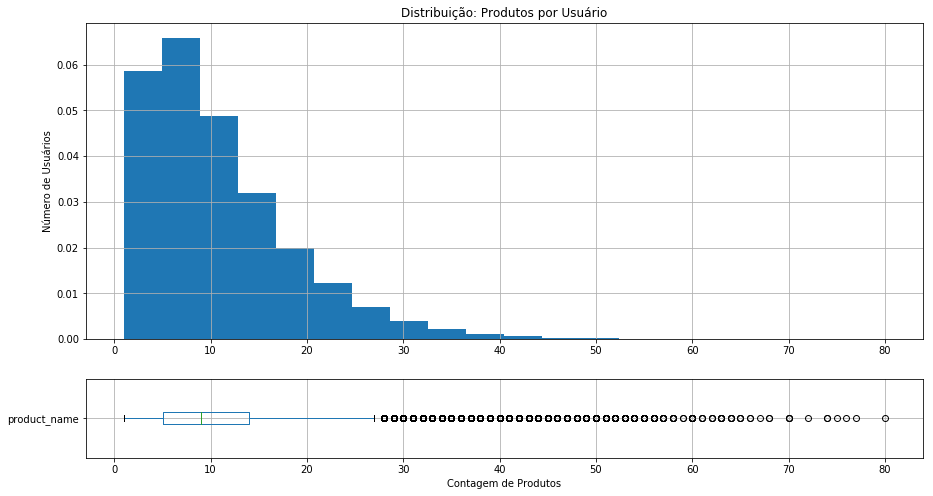

In [9]:
f, axes = plt.subplots(
    2, 1, 
    figsize=(15, 8), 
    sharex=False,
    gridspec_kw={"height_ratios": [4, 1]}
)

product_count.hist(bins=20, figsize=(15,8), normed=True, ax=axes[0], label="Distribuição")
product_count.plot(kind="box", vert=False, ax=axes[1])

axes[0].set(title="Distribuição: Produtos por Usuário")
axes[1].set(xlabel="Contagem de Produtos")
axes[0].set(ylabel="Número de Usuários")
axes[0].grid(True)
axes[1].grid(True)

plt.show()

### A.2) Cortes

Proponha cortes de usuários de forma que não se percam muitos dados e que a distribuição seja mantida. 

Adicione os cortes à visualização usando `segmentos pontilhados de reta` e `textos com os valores dos cortes`.

##### Cálculo do corte de Outliers

Vamos utilizar o método da `Amplitude Inter-Quartil`, ou `IQR`. Para mais informações, veja [esse link](https://www.miniwebtool.com/outlier-calculator/).

In [10]:
q1, q3 = product_count.describe()[["25%", "75%"]]
iqr = q3 - q1

l_sup = q3 + 1.5 * iqr
l_inf = q1 - 1.5 * iqr

print("Corte Superior: {}; Corte Inferior: {}".format(l_sup, l_inf))

Corte Superior: 27.5; Corte Inferior: -8.5


##### Solução

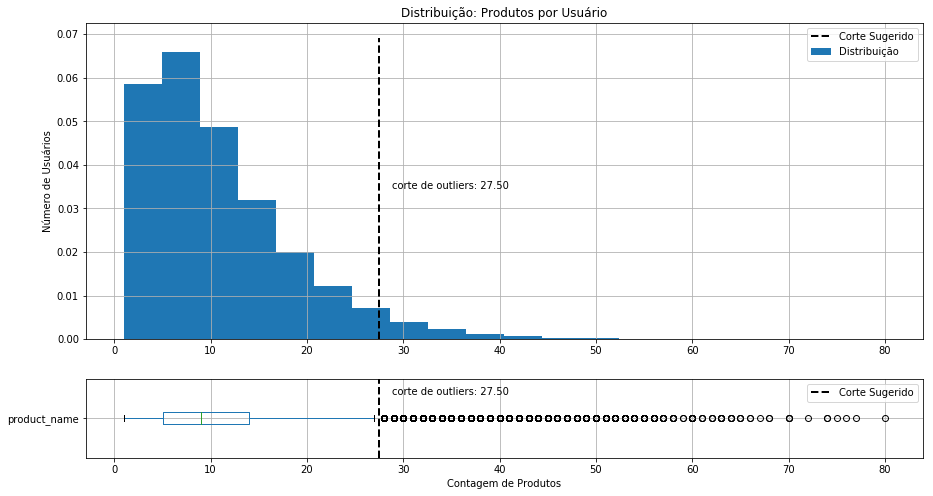

In [11]:
# mesmo código da solução anterior
f, axes = plt.subplots(
    2, 1, 
    figsize=(15, 8), 
    sharex=False,
    gridspec_kw={"height_ratios": [4, 1]}
)

product_count.hist(bins=20, figsize=(15,8), normed=True, ax=axes[0], label="Distribuição")
product_count.plot(kind="box", vert=False, ax=axes[1])

axes[0].set(title="Distribuição: Produtos por Usuário")
axes[1].set(xlabel="Contagem de Produtos")
axes[0].set(ylabel="Número de Usuários")
axes[0].grid(True)
axes[1].grid(True)

# plots do corte superior
x = [l_sup, l_sup]

y0 = axes[0].get_ylim()
axes[0].plot(x, y0, "--k", label='Corte Sugerido', linewidth=2)
axes[0].text(x[0] * 1.05, np.mean(y0), s="corte de outliers: {:.2f}".format(l_sup))
axes[0].legend()

y1 = axes[1].get_ylim()
axes[1].plot(x, y1, "--k", label='Corte Sugerido', linewidth=2)
axes[1].text(x[0] * 1.05, np.mean(y1) * 1.3, s="corte de outliers: {:.2f}".format(l_sup))
axes[1].legend()

# mostra a imagem final
plt.show()

### A.3) Nova Distribuição

Elimine os outliers e construa outro plot da nova distribuição.

In [12]:
product_count_no_outliers = product_count[product_count < l_sup]
product_count_no_outliers.describe()

count    110257.000000
mean          9.577514
std           6.294016
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max          27.000000
Name: product_name, dtype: float64

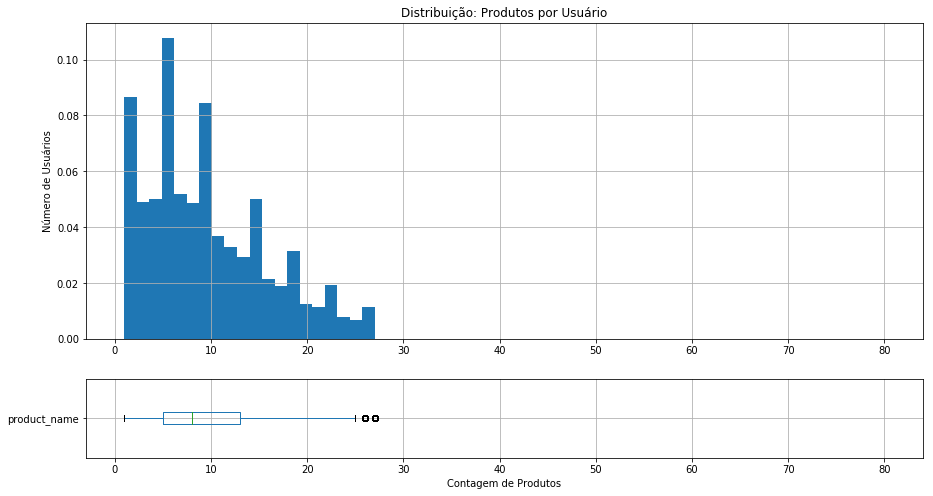

In [13]:
# mesmo código da solução anterior
f, axes = plt.subplots(
    2, 1, 
    figsize=(15, 8), 
    sharex=False,
    gridspec_kw={"height_ratios": [4, 1]}
)

product_count_no_outliers.hist(bins=20, figsize=(15,8), normed=True, ax=axes[0], label="Distribuição")
product_count_no_outliers.plot(kind="box", vert=False, ax=axes[1])

axes[0].set(title="Distribuição: Produtos por Usuário")
axes[1].set(xlabel="Contagem de Produtos")
axes[0].set(ylabel="Número de Usuários")
axes[0].grid(True)
axes[1].grid(True)

# mantendo o mesmo tamanho de eixo dos plots anteriores
axes[0].set(ylabel="Número de Usuários", xlim=(-3, 84))
axes[1].set(xlabel="Contagem de Produtos", xlim=(-3, 84))

plt.show()

## B) Visualização da Distribuição Transformada

Uma técnica que é muito usada para compreender melhor dados de uma distribuição como essa é  a aplicação do `logaritmo` aos dados originais. Para saber mais sobre essa função matemática, consulte [esta referência](https://pt.wikibooks.org/wiki/Matem%C3%A1tica_elementar/Logaritmos).

Aplique o `logaritmo de base 10` à massa de dados e responda aos itens:

B.1) Construa uma visualização composta que mostre a distribuição de dados e os outliers.

B.2) Responda às perguntas:
* Qual o tipo dessa distribuição? 
* Existem Outliers? Descreva-os.

B.3) Proponha cortes de usuários de forma que não se percam muitos dados e que a distribuição seja mantida. Adicione os cortes à visualização usando `segmentos pontilhados de reta` e `textos com os valores dos cortes`.

B.4) Elimine os outliers e construa outro plot da nova distribuição.

### Transformação dos dados

In [14]:
product_count_log = product_count.map(np.log10)

In [15]:
product_count_log.describe()

count    114885.000000
mean          0.891264
std           0.368703
min           0.000000
25%           0.698970
50%           0.954243
75%           1.146128
max           1.903090
Name: product_name, dtype: float64

In [16]:
product_count_log.head()

user_id
1    1.041393
2    1.491362
5    0.954243
7    0.954243
8    1.255273
Name: product_name, dtype: float64

### B.1) Visualização

Construa uma visualização composta que mostre a distribuição de dados e os outliers.

Depois, responda às perguntas:
* Qual o tipo dessa distribuição? 
* Existem Outliers? Descreva-os.

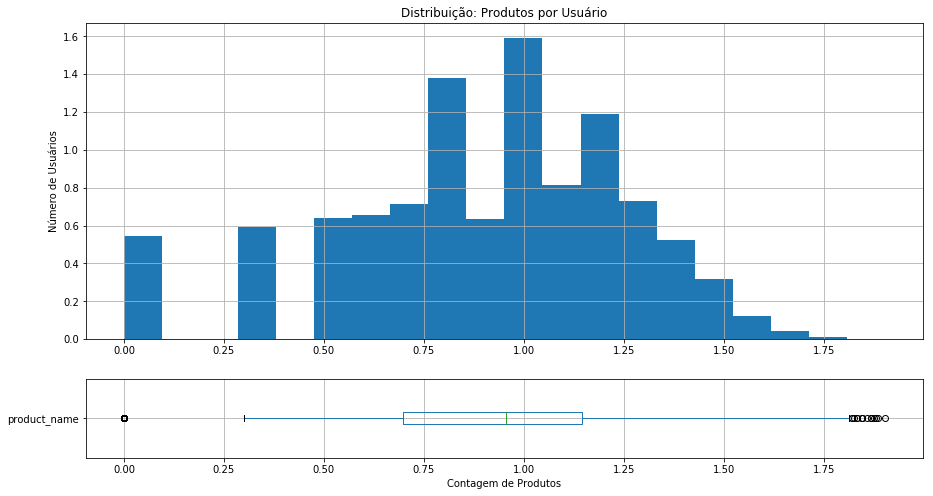

In [17]:
f, axes = plt.subplots(
    2, 1, 
    figsize=(15, 8), 
    sharex=False,
    gridspec_kw={"height_ratios": [4, 1]}
)

product_count_log.hist(bins=20, figsize=(15,8), normed=True, ax=axes[0], label="Distribuição")
product_count_log.plot(kind="box", vert=False, ax=axes[1])

axes[0].set(title="Distribuição: Produtos por Usuário")
axes[1].set(xlabel="Contagem de Produtos")
axes[0].set(ylabel="Número de Usuários")
axes[0].grid(True)
axes[1].grid(True)

plt.show()

### B.2) Cortes

Proponha cortes de usuários de forma que não se percam muitos dados e que a distribuição seja mantida. 

Adicione os cortes à visualização usando `segmentos pontilhados de reta` e `textos com os valores dos cortes`.

In [18]:
# cortes
q1, q3 = product_count_log.describe()[["25%", "75%"]]
iqr = q3 - q1

l_sup = q3 + 1.5 * iqr
l_inf = q1 - 1.5 * iqr

print("Corte Superior: {}; Corte Inferior: {}".format(l_sup, l_inf))

Corte Superior: 1.8168650826915667; Corte Inferior: 0.028232957322690155


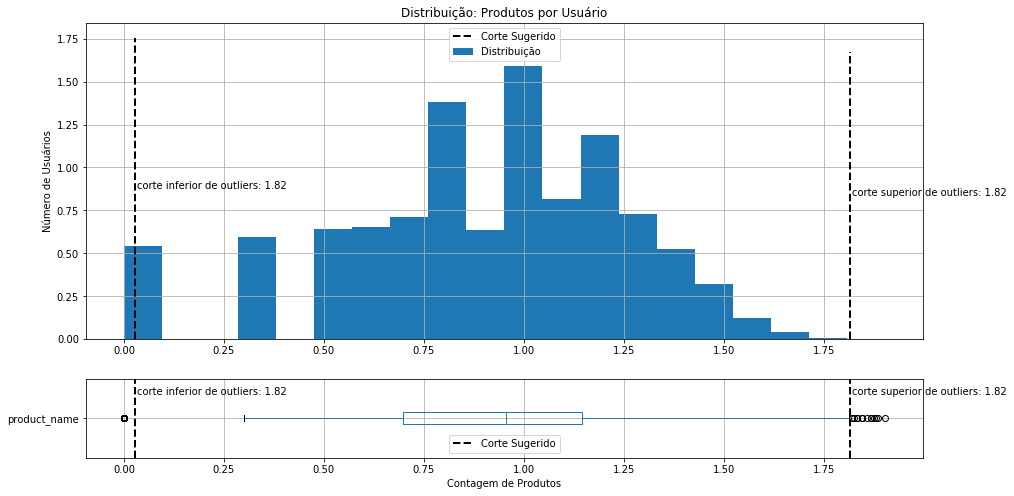

In [19]:
f, axes = plt.subplots(
    2, 1, 
    figsize=(15, 8), 
    sharex=False,
    gridspec_kw={"height_ratios": [4, 1]}
)

product_count_log.hist(bins=20, figsize=(15,8), normed=True, ax=axes[0], label="Distribuição")
product_count_log.plot(kind="box", vert=False, ax=axes[1])

axes[0].set(title="Distribuição: Produtos por Usuário")
axes[1].set(xlabel="Contagem de Produtos")
axes[0].set(ylabel="Número de Usuários")
axes[0].grid(True)
axes[1].grid(True)

# plots do corte superior
x = [l_sup, l_sup]

y0 = axes[0].get_ylim()
axes[0].plot(x, y0, "--k", label='Corte Sugerido', linewidth=2)
axes[0].text(x[0] + .005, np.mean(y0), s="corte superior de outliers: {:.2f}".format(l_sup))
axes[0].legend()

y1 = axes[1].get_ylim()
axes[1].plot(x, y1, "--k", label='Corte Sugerido', linewidth=2)
axes[1].text(x[0] + .005, np.mean(y1) * 1.3, s="corte superior de outliers: {:.2f}".format(l_sup))
axes[1].legend()

# plots do corte inferior
x = [l_inf, l_inf]

y0 = axes[0].get_ylim()
axes[0].plot(x, y0, "--k", linewidth=2)
axes[0].text(x[0] + .005, np.mean(y0), s="corte inferior de outliers: {:.2f}".format(l_sup))

y1 = axes[1].get_ylim()
axes[1].plot(x, y1, "--k", label='Corte Sugerido', linewidth=2)
axes[1].text(x[0] + .005, np.mean(y1) * 1.3, s="corte inferior de outliers: {:.2f}".format(l_sup))

plt.show()

### B.3) Nova Distribuição

Elimine os outliers e construa outro plot da nova distribuição.

In [20]:
index = (product_count_log < l_sup) & (product_count_log > l_inf)
product_count_log_no_outliers = product_count_log[index]
product_count_log_no_outliers.describe()

count    108929.000000
mean          0.939741
std           0.312367
min           0.301030
25%           0.698970
50%           0.954243
75%           1.176091
max           1.812913
Name: product_name, dtype: float64

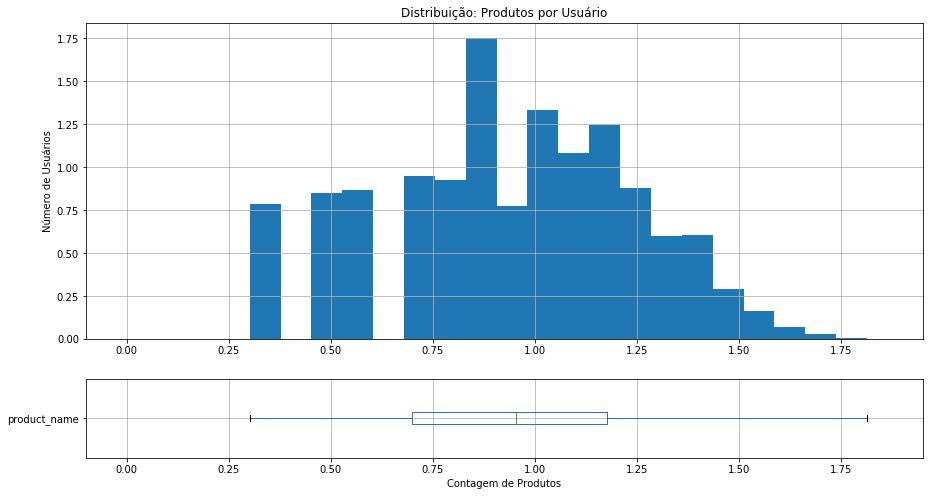

In [21]:
# mesmo código da solução anterior
f, axes = plt.subplots(
    2, 1, 
    figsize=(15, 8), 
    sharex=False,
    gridspec_kw={"height_ratios": [4, 1]}
)

product_count_log_no_outliers.hist(bins=20, figsize=(15,8), normed=True, ax=axes[0], label="Distribuição")
product_count_log_no_outliers.plot(kind="box", vert=False, ax=axes[1])

axes[0].set(title="Distribuição: Produtos por Usuário")
axes[1].set(xlabel="Contagem de Produtos")
axes[0].set(ylabel="Número de Usuários")
axes[0].grid(True)
axes[1].grid(True)

# mantendo o mesmo tamanho de eixo dos plots anteriores
axes[0].set(ylabel="Número de Usuários", xlim=(-0.1, 1.95))
axes[1].set(xlabel="Contagem de Produtos", xlim=(-0.1, 1.95))

plt.show()